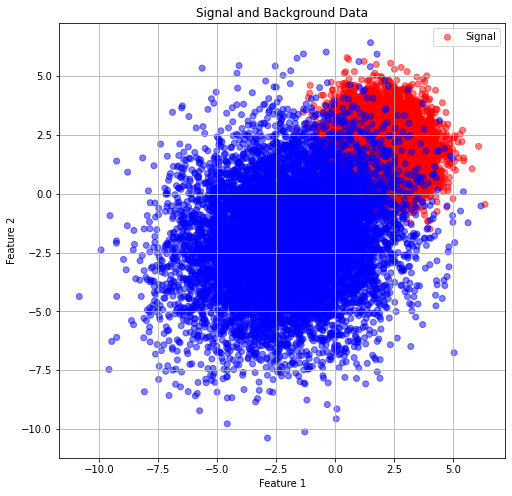

In [1]:
import numpy as np
from matplotlib import pyplot as plt

mean_signal = np.array([2.0 , 2.0])
cov_signal = np.array([[1.0, -0.1], [-0.1, 1.0]])
n_signal = 10000

signals = np.random.multivariate_normal(mean_signal, cov_signal, n_signal)


mean_bkg = np.array([-2.0 , -2.0])
cov_bkg = np.array( [[5.0 , 0.8 ] , [0.8 , 5.0]] )
n_bkg = 10000

bkgs = np.random.multivariate_normal(mean_bkg, cov_bkg, n_bkg)


data = np.vstack((signals, bkgs))
labels = np.hstack((np.ones(n_signal), np.zeros(n_bkg)))

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.5, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Signal and Background Data')
plt.grid(True)
plt.legend(['Signal', 'Background'])
plt.show()



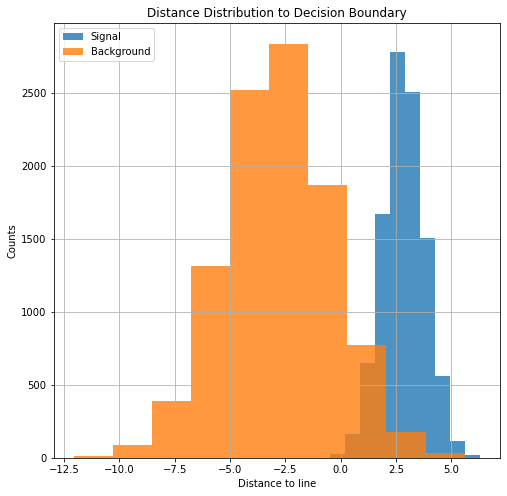

In [2]:
def distance(theta , b):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return sin_theta * data[:,0] - cos_theta * data[:,1] + b*cos_theta


plt.figure(figsize=(8,8) )
theta = 3*np.pi / 4
b = 0.0
distances = distance(theta , b )
plt.hist( distances[labels==1] , alpha=0.8 , label='Signal')
plt.hist( distances[labels==0] , alpha=0.8 , label='Background')

plt.xlabel('Distance to line')
plt.ylabel('Counts')
plt.title('Distance Distribution to Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
def distance_metric(thetas):
    theta_ , data_x  = np.meshgrid( thetas , data[:,0] , indexing='ij' )
    _ , data_y  = np.meshgrid( thetas , data[:,1] , indexing='ij' )
    #print(theta_.shape , data_x.shape , data_y.shape)
    cos_theta = np.cos(theta_)
    sin_theta = np.sin(theta_)
    distances =  sin_theta * data_x - cos_theta * data_y
    
    mean_signal = np.mean( distances[: , labels==1] , axis = 1)
    mean_bkg = np.mean( distances[: , labels==0] , axis = 1)
    std_signal = np.std( distances[: , labels==1] , axis = 1)
    std_bkg = np.std( distances[:  , labels==0] , axis = 1)

    metric = np.abs(mean_signal - mean_bkg ) / ( std_signal + std_bkg )
    return metric

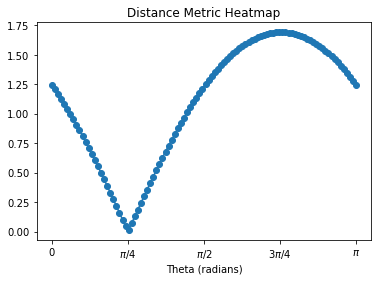

In [4]:
theta_to_scan =  np.linspace(0 , np.pi , 100) 
metrics = distance_metric(theta_to_scan)

fig, ax = plt.subplots()

plt.plot(theta_to_scan, metrics, marker='o')

xticks_positions = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
xticks_labels = ['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$']
ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels)

plt.xlabel('Theta (radians)')
plt.title('Distance Metric Heatmap')
plt.show()

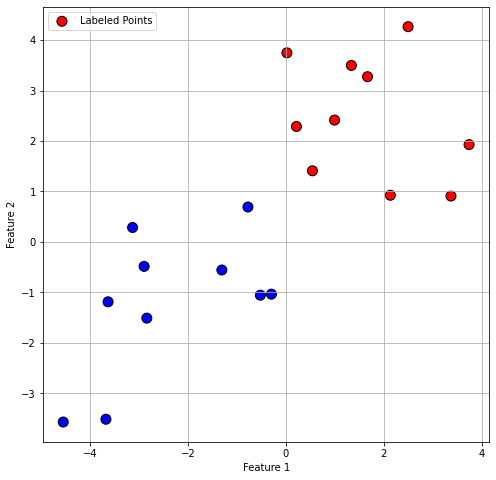

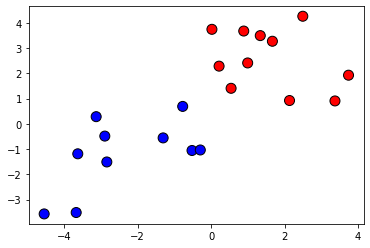

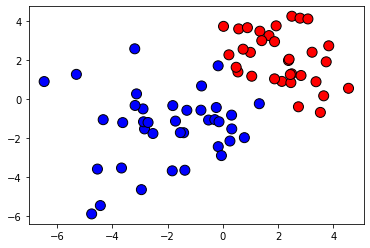

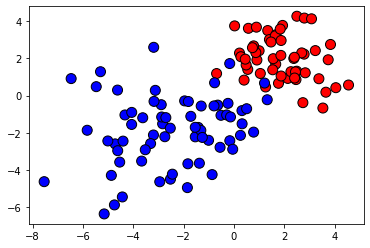

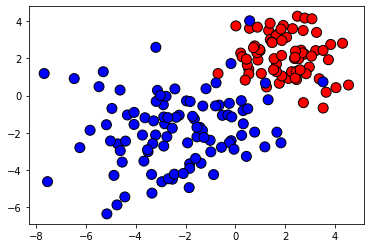

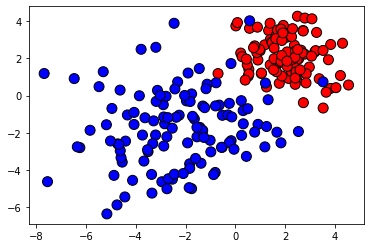

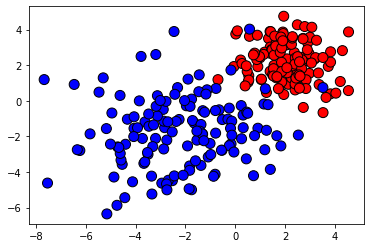

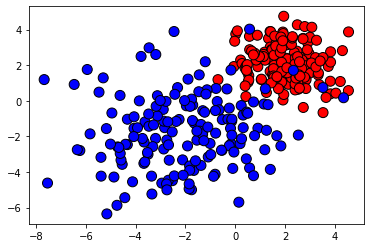

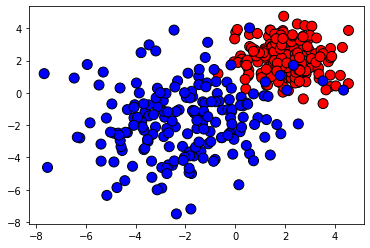

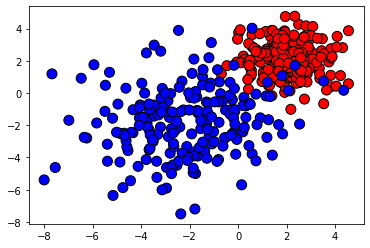

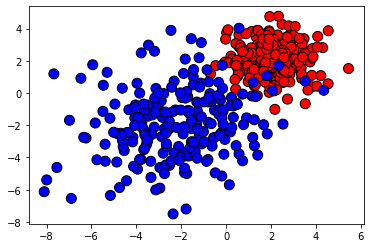

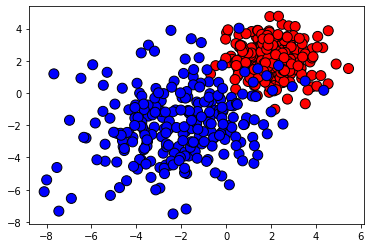

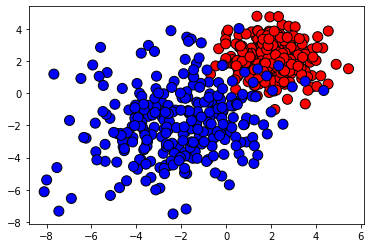

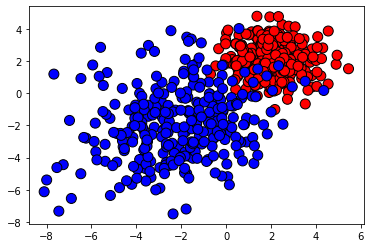

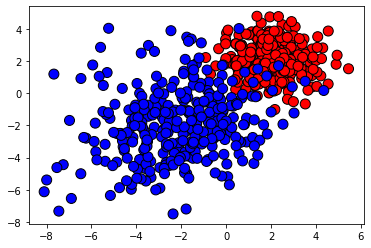

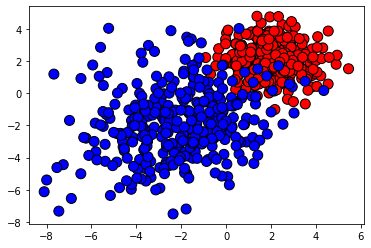

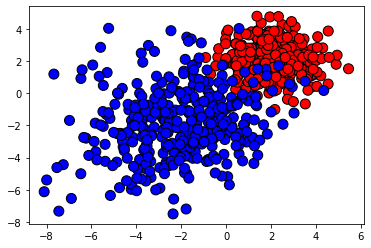

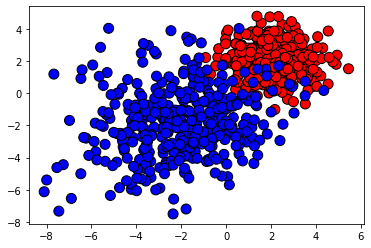

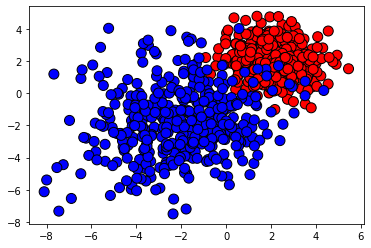

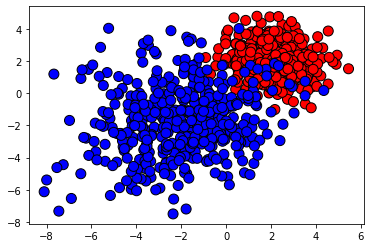

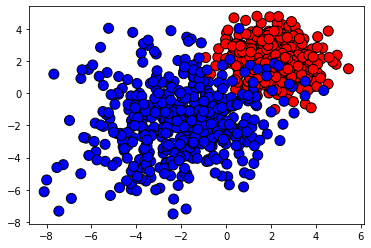

Accuracy: 0.97


In [20]:
#knn classifier


initial_points = np.zeros_like(labels)
initial_points[:10] = 1
initial_points[n_signal:n_signal+10] = 1

K = 5

def knn_predict(X_test):
    dists = np.linalg.norm(data[initial_points == 1] - X_test, axis=1)
    idx = np.argsort(dists)[:K]
    vote = np.mean(labels[initial_points == 1][idx]) > 0.5
    return vote


fig , ax = plt.subplots(figsize=(8,8) )

plt.ion()
plt.clf()

scat = plt.scatter(data[initial_points == 1][:, 0], data[initial_points == 1][:, 1], facecolors='none', edgecolors='k', s=100, label='Labeled Points' , c=labels[initial_points == 1], cmap='bwr')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
fig.canvas.draw()
plt.show()

FP = FN = TP = TN = 0

for i in range(1000):
    rnd = np.random.randint(0, len(data))
    initial_points[rnd] = 1
    point = data[rnd]

    predict = knn_predict(point)

    if predict == 1 and labels[rnd] == 1:
        TP += 1
    elif predict == 1 and labels[rnd] == 0:
        FP += 1
    elif predict == 0 and labels[rnd] == 1:
        FN += 1
    elif predict == 0 and labels[rnd] == 0:
        TN += 1

    if i%50 == 0:
        scat = plt.scatter(data[initial_points == 1][:, 0], data[initial_points == 1][:, 1], facecolors='none', edgecolors='k', s=100, label='Labeled Points' , c=labels[initial_points == 1], cmap='bwr')

        # scat.set_offsets(data[initial_points == 1])
        # scat.set_array(labels[initial_points == 1])
        fig.canvas.draw()
        # plt.pause(0.1)
        plt.show()
        


accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy: {accuracy:.2f}')


